## Bilangan Floating-Point

Himpunan bilangan real $\mathbb{R}$ tak berhingga, karena ia tidak terbatas dan kontinu. Secara komputasi, istilah tak behingga tidak mungkin ditemui. Ini sesuai dengan apa yang dikatakan {cite}`10.5555/260999` bahwa salah satu sifat yang harus dimiliki oleh suatu algoritma (dalam hal ini kita bisa katakan komputasi) adalah keberhinggaan (finiteness). Oleh karena itu, kita perlu mengetahui suatu himpunan berhingga yang dapat dijalankan di komputer (sebagai alat komputasi) yang dapat merepresentasikan bilangan real tersebut. 

```{admonition} Definisi 1.1.1: Bilangan Floating-Point
Himpunan __bilangan floating-point__ $\mathbb{F}$ terdiri dari nilai nol dan semua bilangan yang dibentuk dari

$$
\pm (1+f) \times 2^n,
$$ (eqn:1-1)

dimana $n$ adalah bilangan bulat yang disebut dengan __eksponen__, dan $1+f$ adalah __matissa__ atau __significand__, dengan

$$
f = \sum_{i=1}^{d} b_i 2^{-i}, \hspace{1em} b_i \in \{0, 1\},
$$ (eqn:1-2)

dan bilangan bulat $d$ disebut dengan __presisi__.
```

Persamaan {eq}`eqn:1-2` merepresentasikan significand sebagai bilangan di interval $[1, 2)$ dalam bentuk basis-2. Secara ekuivalen,

$$
f = 2^{-d} \sum_{i=1}^{d} b_i 2^{d-i} = 2^{-d}z,
$$ (eqn:1-3)

untuk suatu bilangan bulat $z$ di himpunan $\{ 0, 1, \cdots, 2^d - 1\}$. Konsekunsinya, mulai dari $2^n$ dan berakhir sebelum $2^{n+1}$, maka terdapat tepat $2^d$ __evenly spaced numbers__ yang dimiliki oleh $\mathbb{F}$. 

`````{admonition} Contoh 1.1.1
:class: tip

Misalkan $d=2$ dan dengan mengambil $n=0$ di {eq}`eqn:1-1`, kita cacah

$$
1 + \frac{0}{4}, 1 + \frac{1}{4}, 1 + \frac{2}{4}, 1 + \frac{3}{4}.
$$

Angka-angka ini adalah anggota dari $\mathbb{F}$ di interval $[1, 2)$ dan mereka dipisahkan oleh $\frac{1}{4}$.
`````

### Presisi dan Akurasi

In [16]:
@show p = 22/7

p = 22 / 7 = 3.142857142857143


3.142857142857143

In [17]:
@show float(pi)

float(pi) = 3.141592653589793


3.141592653589793

In [18]:
accuracy = abs(p - pi)
println("akurasi absolut = $accuracy")
println("akurasi relatif = $(accuracy/pi)")

akurasi absolut = 0.0012644892673496777
akurasi relatif = 0.0004024994347707008


In [26]:
digit = floor(-log10(accuracy/pi))
println("Banyaknya digit yang akurat = $digit")

Banyaknya digit yang akurat = 3.0


### Double precision

In [27]:
@show typeof(1);
@show typeof(1.0);

typeof(1) = Int64
typeof(1.0) = Float64


In [28]:
bitstring(1.0)

"0011111111110000000000000000000000000000000000000000000000000000"

In [29]:
[bitstring(1.0), bitstring(-1.0)]

2-element Vector{String}:
 "0011111111110000000000000000000000000000000000000000000000000000"
 "1011111111110000000000000000000000000000000000000000000000000000"

In [31]:
x = 1.0
@show sign(x), exponent(x), significand(x);

(sign(x), exponent(x), significand(x)) = (1.0, 0, 1.0)


In [32]:
x = 0.25
@show sign(x), exponent(x), significand(x)

(sign(x), exponent(x), significand(x)) = (1.0, -2, 1.0)


(1.0, -2, 1.0)

In [33]:
x = -0.25
@show sign(x), exponent(x), significand(x)

(sign(x), exponent(x), significand(x)) = (-1.0, -2, -1.0)


(-1.0, -2, -1.0)

In [34]:
eps()

2.220446049250313e-16

In [35]:
log2(eps())

-52.0

In [36]:
eps(1.618)

2.220446049250313e-16

In [37]:
eps(161.8)

2.842170943040401e-14

In [38]:
nextfloat(161.8)

161.80000000000004

In [41]:
@show floatmin(), floatmax();

(floatmin(), floatmax()) = (2.2250738585072014e-308, 1.7976931348623157e308)


In [42]:
1/7

0.14285714285714285

In [43]:
37.3 + 1

38.3

In [44]:
2^(-4)

0.0625

In [45]:
@show 5.0, Int(5.0);

(5.0, Int(5.0)) = (5.0, 5)


### Aritmatika Floating-Point

In [46]:
emach = eps()/2
(1.0 + emach) - 1.0

0.0

In [47]:
1.0 + (emach - 1.0)

1.1102230246251565e-16

In [64]:
using Plots

nilai_d1 = collect(1:9);
nilai_d2 = collect(0:9);
nilai_E = [0.0, -1.0, -2.0];

for E in nilai_E
    for d1 in nilai_d1
        for d2 in nilai_d2
            println((d1 + d2 * 0.1) * 10^E)
            println( -(d1 + d2 * 0.1) * 10^E)
        end
    end
end

1.0
-1.0
1.1
-1.1
1.2
-1.2
1.3
-1.3
1.4
-1.4
1.5
-1.5
1.6
-1.6
1.7000000000000002
-1.7000000000000002
1.8
-1.8
1.9
-1.9
2.0
-2.0
2.1
-2.1
2.2
-2.2
2.3
-2.3
2.4
-2.4
2.5
-2.5
2.6
-2.6
2.7
-2.7
2.8
-2.8
2.9
-2.9
3.0
-3.0
3.1
-3.1
3.2
-3.2
3.3
-3.3
3.4
-3.4
3.5
-3.5
3.6
-3.6
3.7
-3.7
3.8
-3.8
3.9
-3.9
4.0
-4.0
4.1
-4.1
4.2
-4.2
4.3
-4.3
4.4
-4.4
4.5
-4.5
4.6
-4.6
4.7
-4.7
4.8
-4.8
4.9
-4.9
5.0
-5.0
5.1
-5.1
5.2
-5.2
5.3
-5.3
5.4
-5.4
5.5
-5.5
5.6
-5.6
5.7
-5.7
5.8
-5.8
5.9
-5.9
6.0
-6.0
6.1
-6.1
6.2
-6.2
6.3
-6.3
6.4
-6.4
6.5
-6.5
6.6
-6.6
6.7
-6.7
6.8
-6.8
6.9
-6.9
7.0
-7.0
7.1
-7.1
7.2
-7.2
7.3
-7.3
7.4
-7.4
7.5
-7.5
7.6
-7.6
7.7
-7.7
7.8
-7.8
7.9
-7.9
8.0
-8.0
8.1
-8.1
8.2
-8.2
8.3
-8.3
8.4
-8.4
8.5
-8.5
8.6
-8.6
8.7
-8.7
8.8
-8.8
8.9
-8.9
9.0
-9.0
9.1
-9.1
9.2
-9.2
9.3
-9.3
9.4
-9.4
9.5
-9.5
9.6
-9.6
9.7
-9.7
9.8
-9.8
9.9
-9.9
0.1
-0.1
0.11000000000000001
-0.11000000000000001
0.12
-0.12
0.13
-0.13
0.13999999999999999
-0.13999999999999999
0.15000000000000002
-0.15000000000000002
0.1600

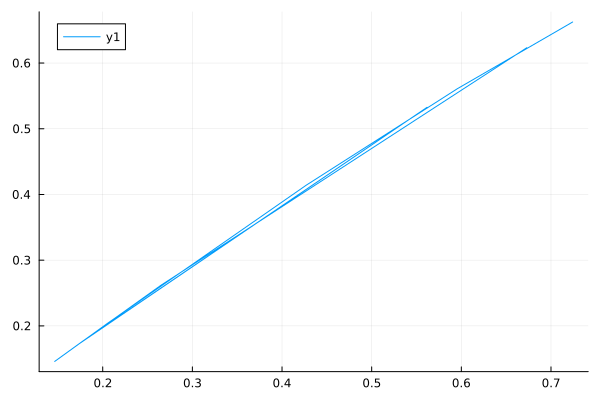

In [10]:
using Plots

plot(sin, rand(10))

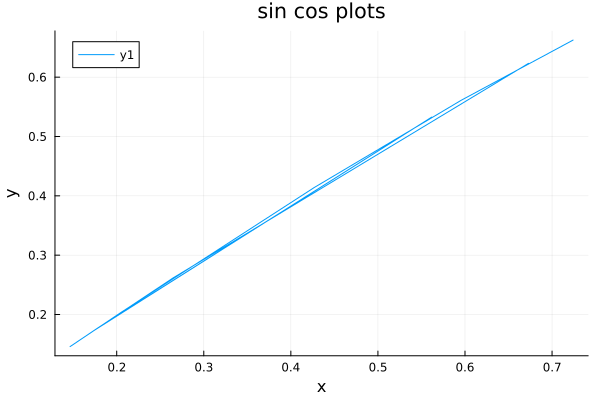

In [11]:
plot!(title="sin cos plots", xlabel="x", ylabel="y")